<b> Load packages

In [1]:
library(glmnet)
library(MASS)
library(readxl)
library(plotmo)
library(MLmetrics)
library(lavaan)
library(ggplot2)
library(gridExtra)
library(tidyverse)


Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Loaded glmnet 3.0-2

Warning message:
"package 'plotmo' was built under R version 3.6.2"Loading required package: Formula
Loading required package: plotrix
Loading required package: TeachingDemos
Warning message:
"package 'TeachingDemos' was built under R version 3.6.2"Warning message:
"package 'MLmetrics' was built under R version 3.6.2"
Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall

Warning message:
"package 'lavaan' was built under R version 3.6.2"This is lavaan 0.6-5
lavaan is BETA software! Please report any bugs.
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'gridExtra' was built under R version 3.6.2"Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.4


<b> Input the data

In [2]:
data <- read_excel("Math Department Diet Mood total .xlsx")

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2588 / R2588C1: got '2019/10/06 10:49:36 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2589 / R2589C1: got '2019/10/06 10:50:51 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2590 / R2590C1: got '2019/10/06 11:03:45 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2591 / R2591C1: got '2019/10/06 11:26:50 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2592 / R2592C1: got '2019/10/06 4:23:19 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2593 / R2593C1: got '2019/10/06 4:25:01 PM AST'"Warning message in read_fun(path = enc2native(normalizePath(path))

<b> Check data and variables

In [3]:
dim(data)

[1] 2636   27

In [4]:
for (i in 1:length(data)) {
  data[,i] = as.factor(as.matrix(data[,i]))
  print(unique(data[,i]))
}

# A tibble: 2,533 x 1
   Timestamp          
   <fct>              
 1 2014-03-11 06:39:38
 2 2014-03-11 06:42:58
 3 2014-03-11 07:04:07
 4 2014-03-11 07:14:35
 5 2014-03-11 07:17:27
 6 2014-03-11 07:20:44
 7 2014-03-11 07:33:16
 8 2014-03-11 07:41:05
 9 2014-03-11 07:45:39
10 2014-03-11 07:46:18
# ... with 2,523 more rows
# A tibble: 4 x 1
  `1. What is your gender?`
  <fct>                    
1 Female                   
2 Male                     
3 <NA>                     
4 Other                    
# A tibble: 10 x 1
   `2. What is your age?`
   <fct>                 
 1 18-29                 
 2 30-39                 
 3 40-49                 
 4 50 and above          
 5 40-50                 
 6 50-60                 
 7 Over 70               
 8 18-25                 
 9 30-40                 
10 25-29                 
# A tibble: 10 x 1
   `3. In which region you are living now?`
   <fct>                                   
 1 Asia                                    
 2 Nort

<b> Rename the data

In [5]:
names(data) = c("timestamp","gender","age","region","education","diet",
                "exercise","breakfast","whole_grain","dairy_product","coffee",
                "fruits","flaxseed_nuts","rice_pasta","meat","vegetables","beans"
                ,"fish","fast_food","multivitamin","fish_oil",
                "nervous","hopeless","restless","depressed","effort","worthless")
names(data)

[1] "timestamp"     "gender"        "age"           "region"       
 [5] "education"     "diet"          "exercise"      "breakfast"    
 [9] "whole_grain"   "dairy_product" "coffee"        "fruits"       
[13] "flaxseed_nuts" "rice_pasta"    "meat"          "vegetables"   
[17] "beans"         "fish"          "fast_food"     "multivitamin" 
[21] "fish_oil"      "nervous"       "hopeless"      "restless"     
[25] "depressed"     "effort"        "worthless"

# 1.1 Cleaning the data 

### Remove observations with N/A

In [6]:
data = na.omit(data)
dim(data)[1]

[1] 2328

### Remove, combine and rename

For **Gender**:

There is only one **Other** observation. For better analysis on data, I remove levels with only one observation, the same for other variables.

In [7]:
data = data [-which(data$gender=='Other'),]
dim(data)[1]

[1] 2327

Check **Gender** levels

In [8]:
unique(data[,2])

gender
Female
Male


----

For **Region**:
- There are two **Option 8** observations.
- There are repeated levels such as: **Middle East/North Africa** and **Africa**, **Australia** and **Australia /New Zealand**. I combine those observations into **Africa** and **Australia**.

In [9]:
ureg = unique(data$region)
unique(data[,4])

region
Asia
North America/Central America
Middle East/North Africa
Europe
Africa
Australia
South America
Option 8
Australia /New Zealand
Australia


In [10]:
data = data [-which(data$region==ureg[8]),]
dim(data)[1]

[1] 2325

In [11]:
#combine into Africa
data$region[which(data$region==ureg[3])] = ureg[5]
#combine into Australia/New Zealand
data$region[which(data$region==ureg[6])] = ureg[9]
data$region[which(data$region==ureg[10])] = ureg[9]
dim(data)[1]

[1] 2325

Check **Region** levels

In [12]:
unique(data[,4])

region
Asia
North America/Central America
Africa
Europe
Australia /New Zealand
South America


----

For **Diet** (type):
- There are repeated levels, such as **Mediterranean Diet** due to the spelling.
- There are **Sophomore** observations, which are levels from other column.
- **Asian diet, Caribbean diet, Korean diet, Vegan diet** each only has one observations.

In [13]:
udt = unique(data$diet)
unique(data[,6])

diet
Mediterranean Diet
Eastern Diet
Western Diet
Mediterrenean Diet
Mediterrean Diet
Western Diet
Vegetarian
Vegan
Caribbean diet
Mediterranean Diet


In [14]:
#combine all Mediterranean Diet
data$diet[which(data$diet==udt[1])] = udt[10]
data$diet[which(data$diet==udt[4])] = udt[10]
data$diet[which(data$diet==udt[5])] = udt[10]
#combine all Western Diet
data$diet[which(data$diet==udt[3])] = udt[6]
data$diet[which(data$diet==udt[11])] = udt[6]
#remove Sophomore observations
data = data[-which(data$diet==udt[15]),]
dim(data)[1]
#remove Asian diet, Caribbean diet, Korean diet, Vegan diet
data = data[-which(data$diet==udt[7]),]
data = data[-which(data$diet==udt[8]),]
data = data[-which(data$diet==udt[9]),]
data = data[-which(data$diet==udt[12]),]
data = data[-which(data$diet==udt[13]),]
data = data[-which(data$diet==udt[14]),]
dim(data)[1]

[1] 2323

[1] 2314

Check **Diet** levels

In [15]:
unique(data[,6])

diet
Mediterranean Diet
Eastern Diet
Western Diet


---

For **Breakfast**:

In [16]:
u8 = unique(data$breakfast)
unique(data[,8])

breakfast
4 times
6 or 7 times
1 time
5 times
3 times
2 times
None
Never


In [17]:
data$breakfast[which(data$breakfast==u8[8])] = u8[7]
dim(data)[1]

[1] 2314

Check **Breakfast** levels:

In [18]:
unique(data[,8])

breakfast
4 times
6 or 7 times
1 time
5 times
3 times
2 times
None


---

For **Whole grain**:

In [19]:
u9 = unique(data$whole_grain)
unique(data[,9])

whole_grain
More than 4 times
1 time
2 times
None
4 times
3 times
2 times


In [20]:
data$whole_grain[which(data$whole_grain==u9[3])] = u9[7]
dim(data)[1]

[1] 2314

Check **Whole grain** levels:

In [21]:
unique(data[,9])

whole_grain
More than 4 times
1 time
2 times
None
4 times
3 times


---

For **Dairy product**:

In [22]:
u10 = unique(data$dairy_product)
unique(data[,10])

dairy_product
More than 4 times
1 time
2 times
3 times
4 times
None
More that 4 times
1 serving


In [23]:
data$dairy_product[which(data$dairy_product==u10[8])] = u10[2]
data$dairy_product[which(data$dairy_product==u10[7])] = u10[1]
dim(data)[1]

[1] 2314

Check **Dairy product** levels:

In [24]:
unique(data[,10])

dairy_product
More than 4 times
1 time
2 times
3 times
4 times
None


---

For **Coffee**:

In [25]:
u11 = unique(data$coffee)
unique(data[,11])

coffee
More than 4 times
3 times
2 times
None
4 times
1 time
Never


In [26]:
data$coffee[which(data$coffee==u11[7])] = u11[4]
dim(data)[1]

[1] 2314

Check **Coffee** levels:

In [27]:
unique(data[,11])

coffee
More than 4 times
3 times
2 times
None
4 times
1 time


---

For **Vegetables**:

In [28]:
u16 = unique(data$vegetables)
unique(data[,16])

vegetables
1 time
2 times
4 times
More than 4 times
3 times
None
1 serving


In [29]:
data$vegetables[which(data$vegetables==u16[7])] = u16[1]
dim(data)[1]

[1] 2314

Check **Vegetables** levels:

In [30]:
unique(data[,16])

vegetables
1 time
2 times
4 times
More than 4 times
3 times
None


---

For **Beans**:

In [31]:
u17 = unique(data$beans)
unique(data[,17])

beans
None
1 time
4 times
2 times
3 times
More than 4 times
2 times


In [32]:
data$beans[which(data$beans==u17[4])] = u17[7]
dim(data)[1]

[1] 2314

Check **Beans** levels:

In [33]:
unique(data[,17])

beans
None
1 time
4 times
2 times
3 times
More than 4 times


---

For **Fish oil**:

In [34]:
u21 = unique(data$fish_oil)
unique(data[,21])

fish_oil
None
1 time
More than 4 times
2 times
3 times
4 times
1 times


In [35]:
data$fish_oil[which(data$fish_oil==u21[7])] = u21[1]
dim(data)[1]

[1] 2314

Check **Fish oil** levels:

In [36]:
unique(data[,21])

fish_oil
None
1 time
More than 4 times
2 times
3 times
4 times


---

For **Nervous**:

In [37]:
u22 = unique(data$nervous)
unique(data[,22])

nervous
All the time
Some of the time
Most of the time
None of the time
A little of the time
None


In [38]:
data$nervous[which(data$nervous==u22[6])] = u22[4]
dim(data)[1]

[1] 2314

Check **Nervous** levels:

In [39]:
unique(data[,22])

nervous
All the time
Some of the time
Most of the time
None of the time
A little of the time


---

After above cleaning, there are **2314** observations left.

# 1.2 Convert categorical variables into numerical variables

To obtain more information from the data, I convert a categorical variable into a numerical variable if levels of variable indicate clear order.

In [40]:
x=as.data.frame(data[,2:21])
y=as.matrix(data[,22:27])

- For **Education**, I convert it into number 1 to 8, from low education level to high education level according to the order of 'Less than high school','High school','AA, BA, BS','Graduate','Master's Degree','Doctoral Degree','Professional Degree','Professional'.

In [41]:
xm1 = matrix(0,dim(x)[1],1)
for (i in 1:dim(x)[1]) {
  if (x[i,4]=="Less than High School"){
    xm1[i,1]=1
  }
  if (x[i,4]=="High School"){
    xm1[i,1]=2
  }
  if (x[i,4]=="2 or 4 Years of College Degree (AA, BA, BS)"){
    xm1[i,1]=3
  }
  if (x[i,4]=="Graduate"){
    xm1[i,1]=4
  }
  if (x[i,4]=="Master's Degree"){
    xm1[i,1]=5
  }
  if (x[i,4]=="Doctoral Degree"){
    xm1[i,1]=6
  }
  if (x[i,4]=="Professional Degree (MD, JD, PharmD, ...)"){
    xm1[i,1]=7
  }
  if (x[i,4]=="Professional"){
    xm1[i,1]=8
  }
}
x[,4]=xm1


In [42]:
unique(x$edu)

3
5
6
2
7
1
8
4


- For the frequency of consuming different type of food, I convert 'None' into 0, and 'More than X times' into X +1, frequency between 1 and X to the relative number.

In [43]:
xm=matrix(0,dim(x)[1],dim(x)[2])
for (i in 6:20) {
  for (j in 1:nrow(x)) {
    if (x[j,i]=='None'){
      xm[j,i]=0
    }
    if (x[j,i]=='1 time'){
      xm[j,i]=1
    }
    if ((x[j,i]=='2 times')|(x[j,i]==unique(x[,8])[3])){
      xm[j,i]=2
    }
    if ((x[j,i]=='3 times')|(x[j,i]==unique(x[,12])[2])){
      xm[j,i]=3
    }
    if (x[j,i]=='4 times'){
      xm[j,i]=4
    }
    if ((x[j,i]=='5 times')|(x[j,i]=='More than 4 times')){
      xm[j,i]=5
    }
    if (x[j,i]=='6 or 7 times'){
      xm[j,i]=6
    }
  }
}
x[,6:20]=xm[,6:20]

In [44]:
for (i in 6:20) {
  print(unique(x[,i]))
}

[1] 0 1 2 4 5 3
[1] 4 6 1 5 3 2 0
[1] 5 1 2 0 4 3
[1] 5 1 2 3 4 0
[1] 5 3 2 0 4 1
[1] 3 4 1 2 5 0
[1] 1 3 0 5 2 4
[1] 5 2 4 3 1 0
[1] 5 2 4 3 1 0
[1] 1 2 4 5 3 0
[1] 0 1 4 2 3 5
[1] 1 0 3 2 5 4
[1] 0 1 4 5 2 3
[1] 0 5 2 1 3 4
[1] 0 1 5 2 3 4


- To interpret the mental health status better, I convert 'All the time'... 'None of the time' into 1 to 5, and get a new response called **mental health score** from the average of the original 6 responses.

In [45]:
s=matrix(0,dim(y)[1],dim(y)[2])
for (i in 1:dim(y)[1]) {
  for (j in 1:dim(y)[2]) {
    if (y[i,j]=='None of the time'){
      s[i,j]=5
    }
    if (y[i,j]=='A little of the time'){
      s[i,j]=4
    }
    if (y[i,j]=='Some of the time'){
      s[i,j]=3
    }
    if (y[i,j]=='Most of the time'){
      s[i,j]=2
    }
    if (y[i,j]=='All the time'){
      s[i,j]=1
    }
  }
}
y=rowMeans(s)

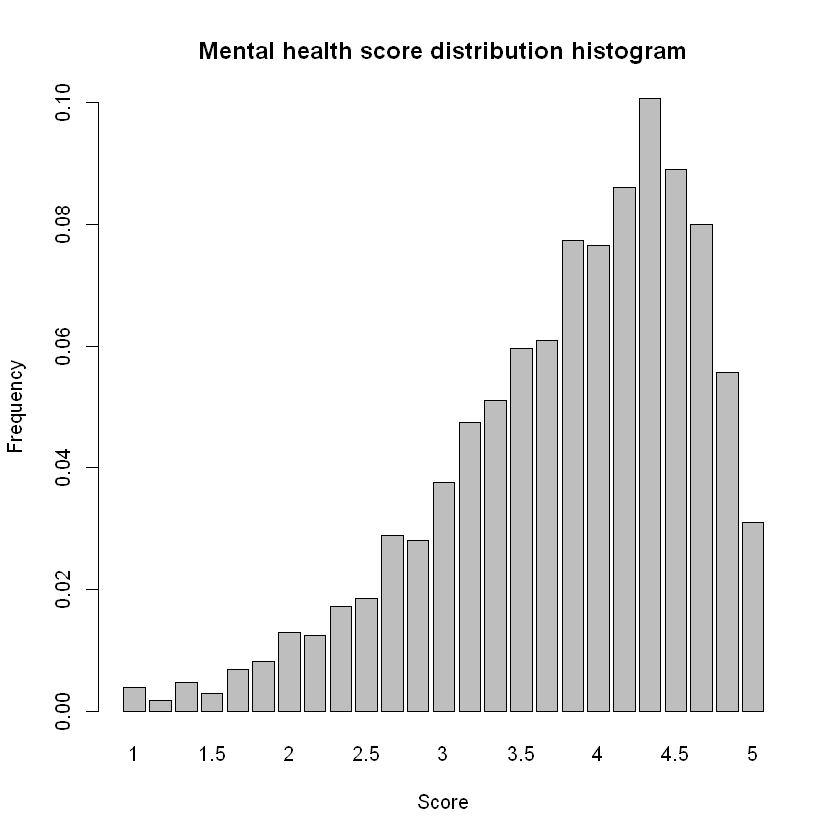

In [46]:
barplot(prop.table(table(y)),main = 'Mental health score distribution histogram',xlab = 'Score', ylab = 'Frequency')

# 1.3 Visualization

Visualize the data to check.

For each level/value, the scatter plot shows the distribution of mental health score, lines connect means of mental health score, and colors indicate increasing or decreasing (red or blue).

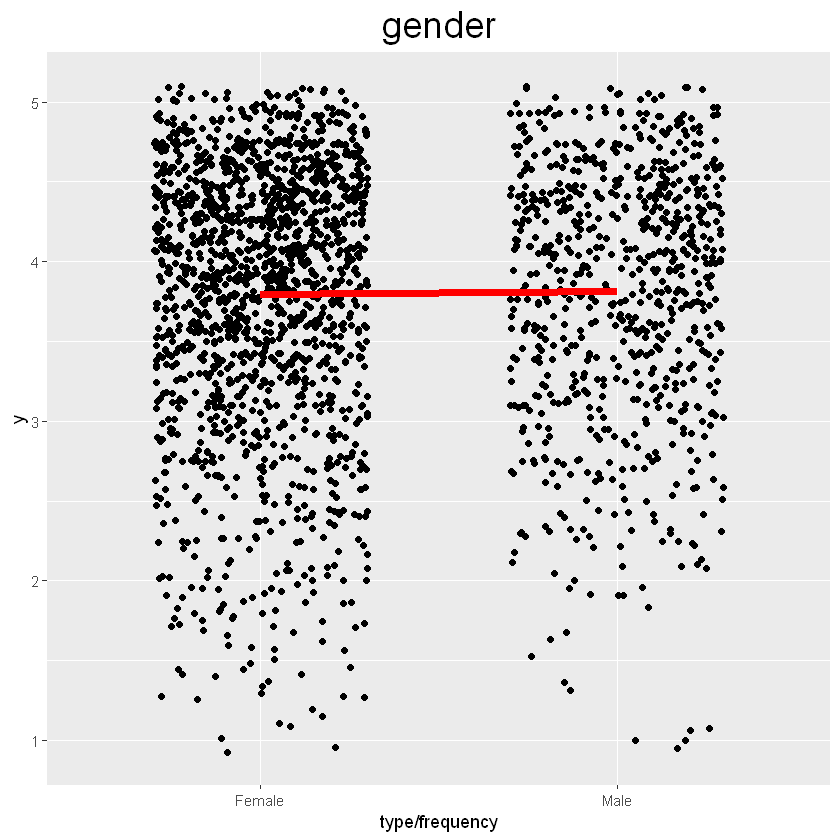

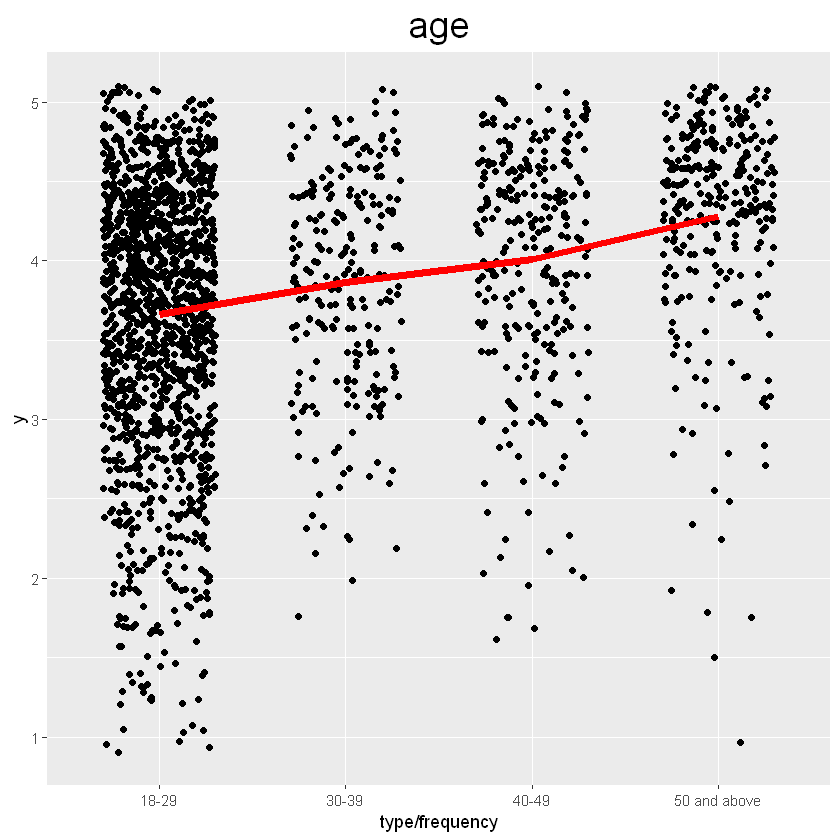

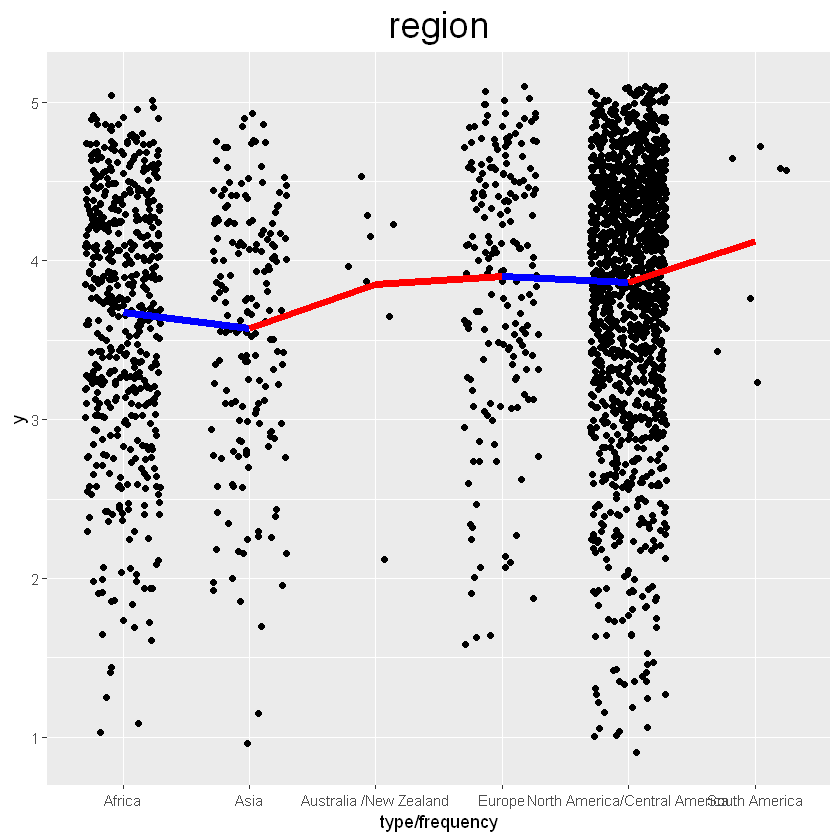

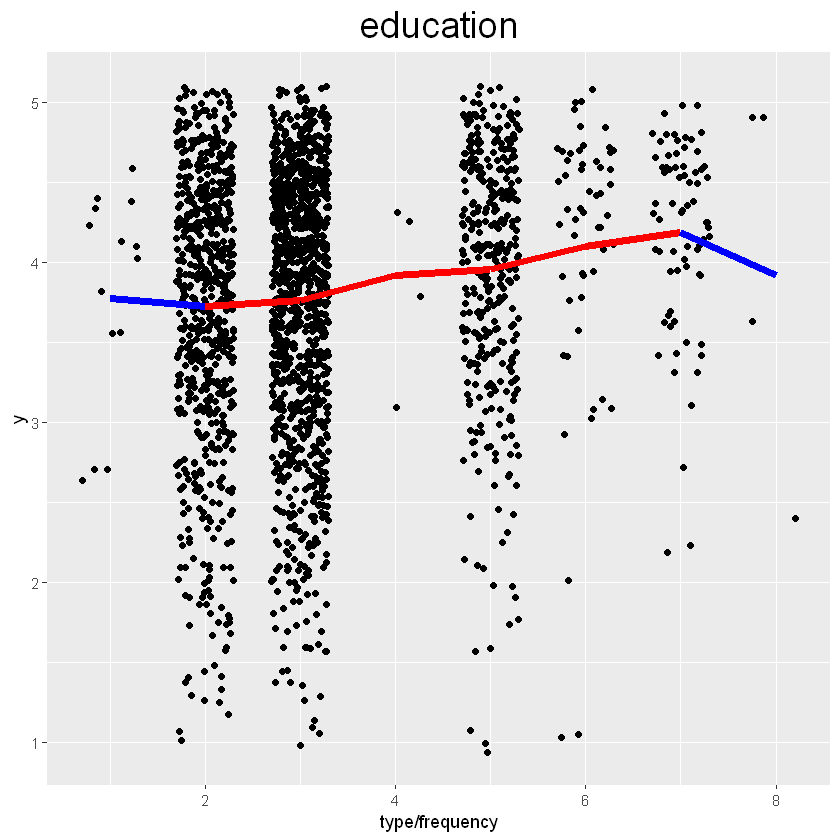

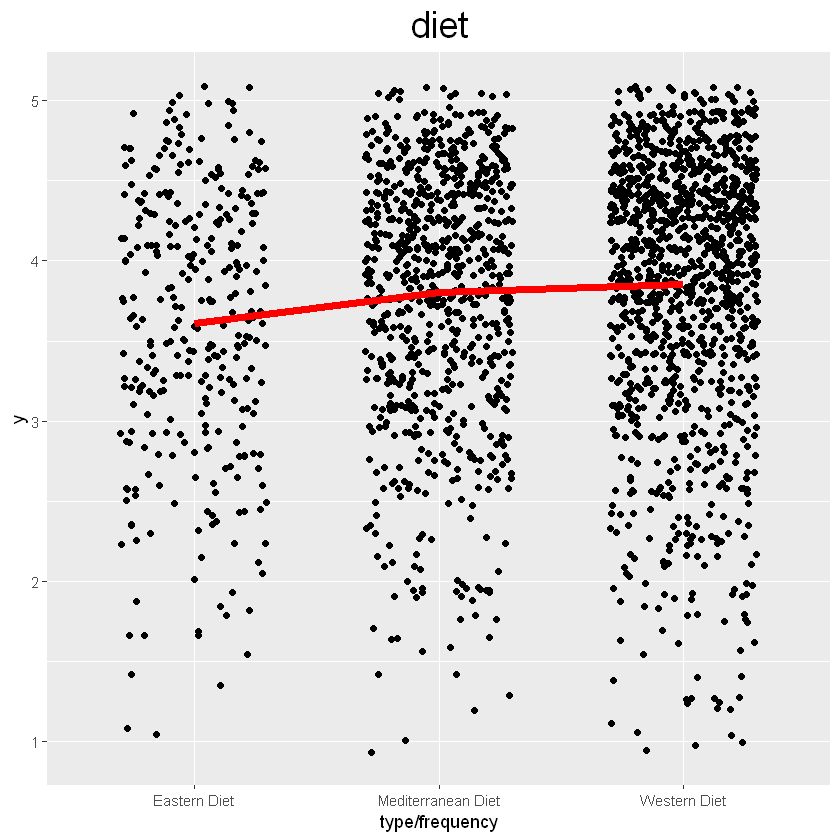

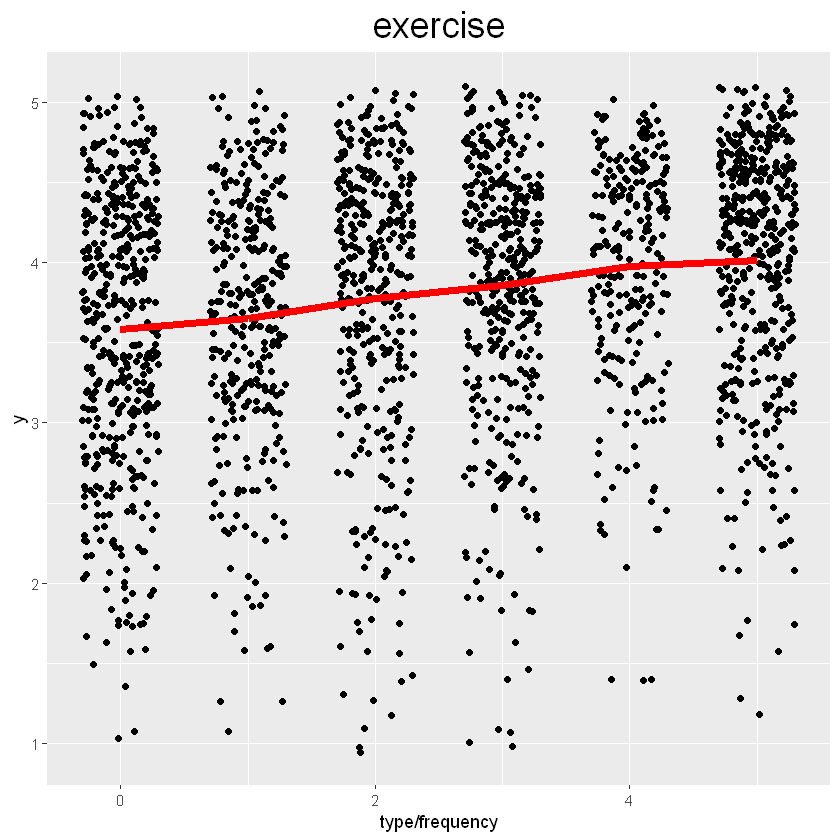

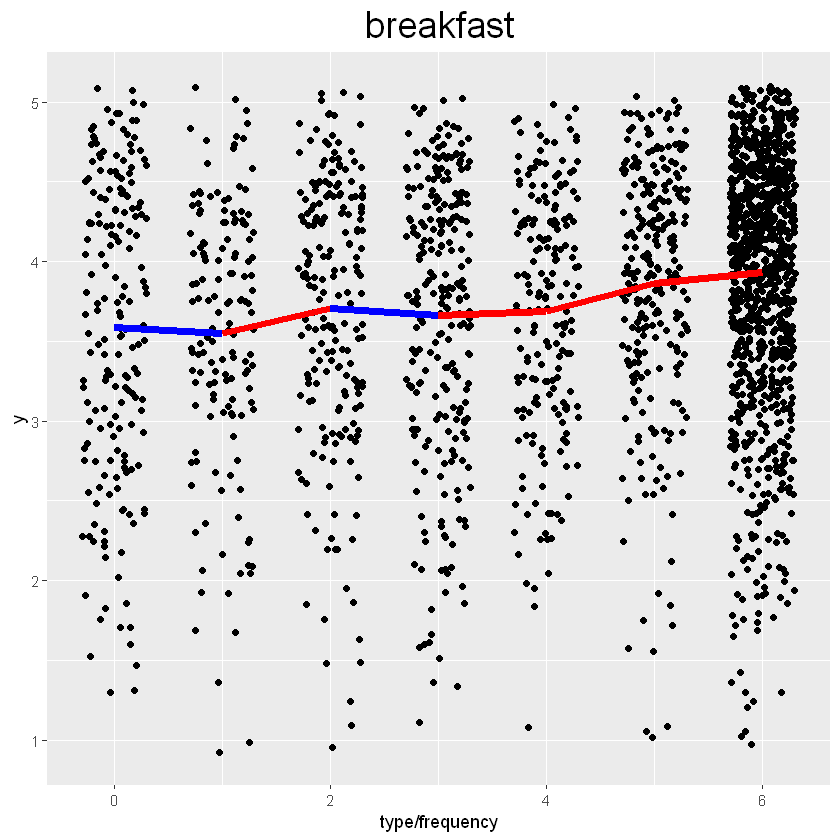

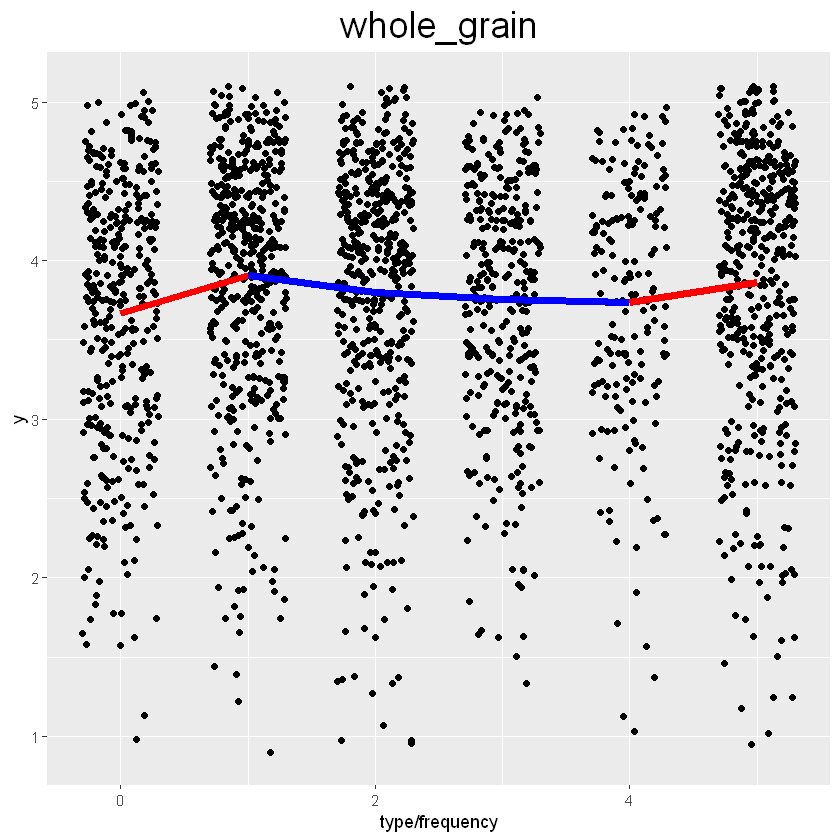

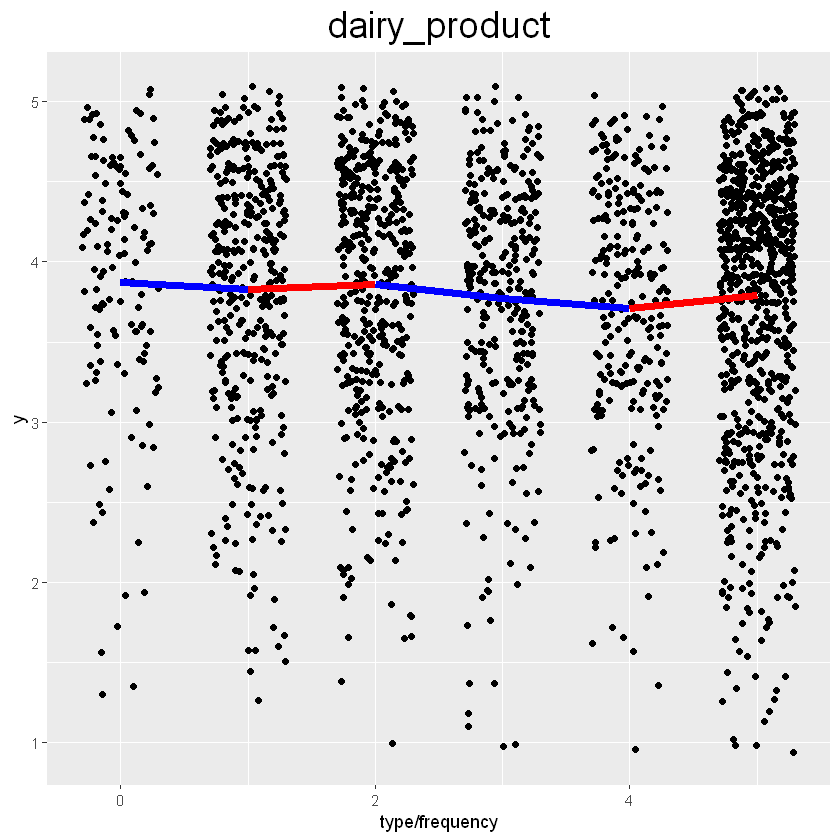

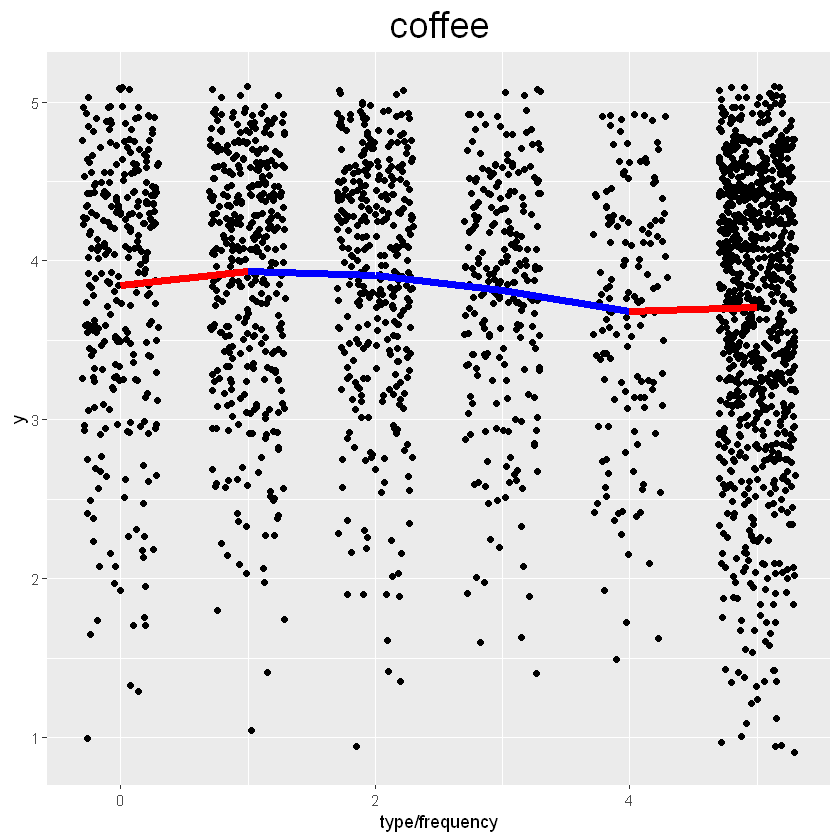

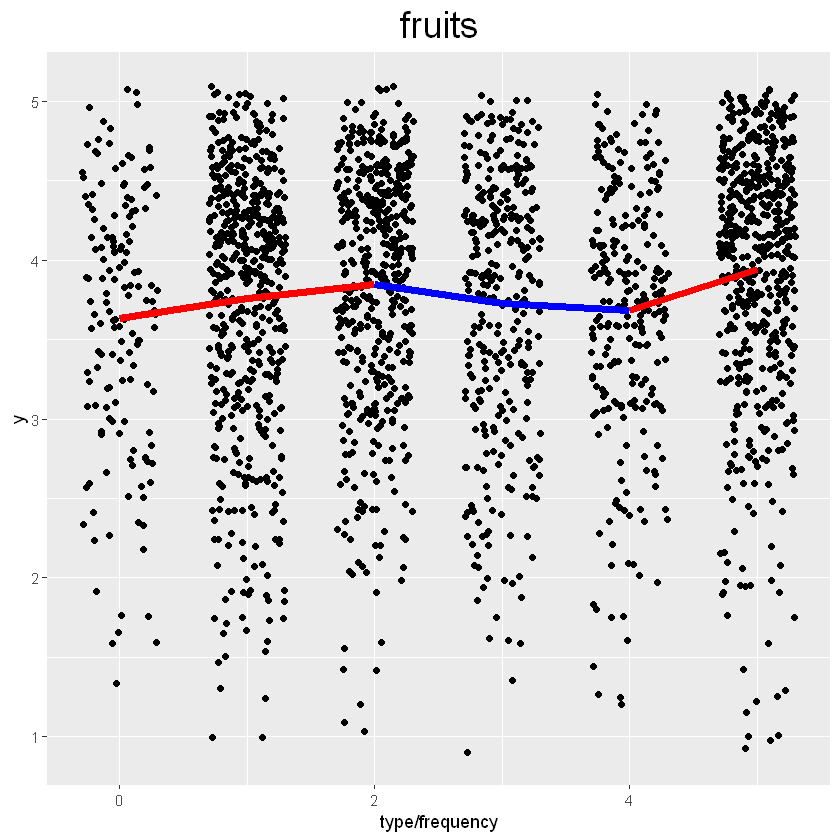

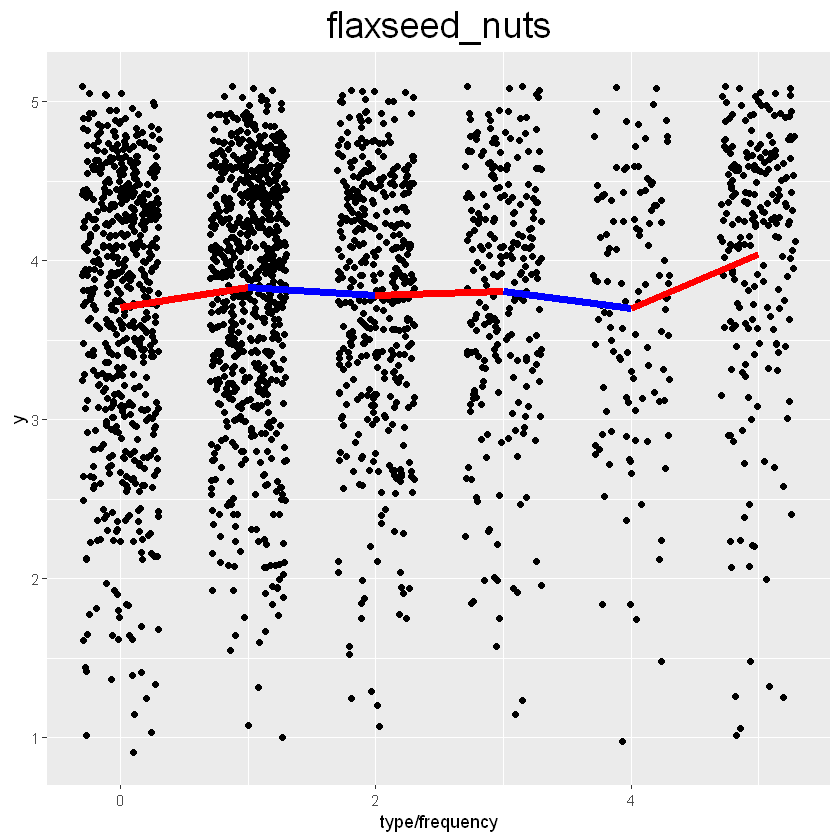

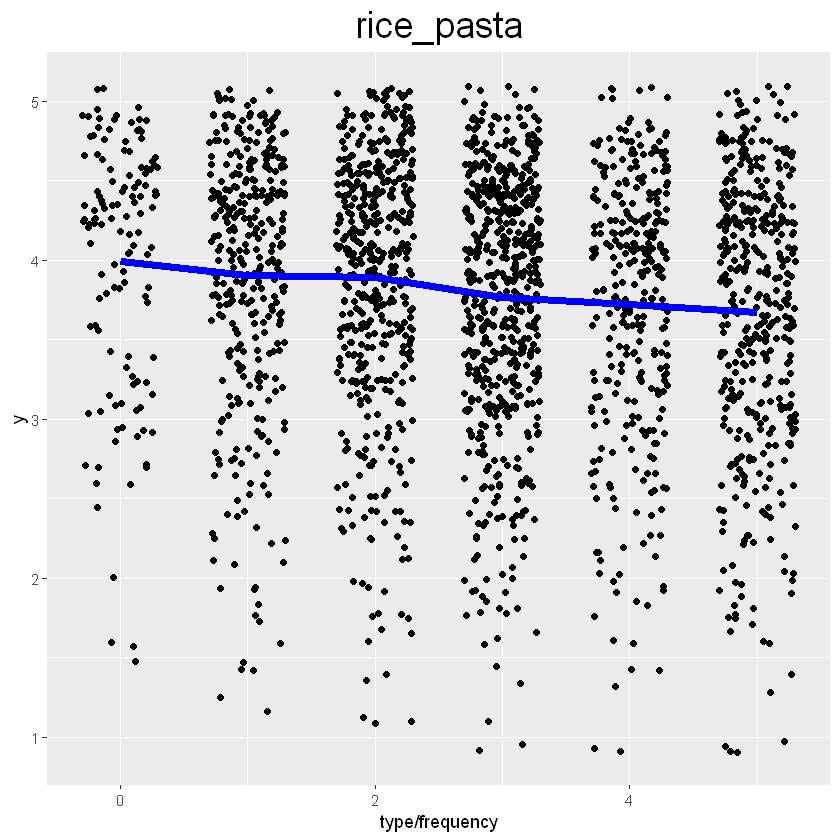

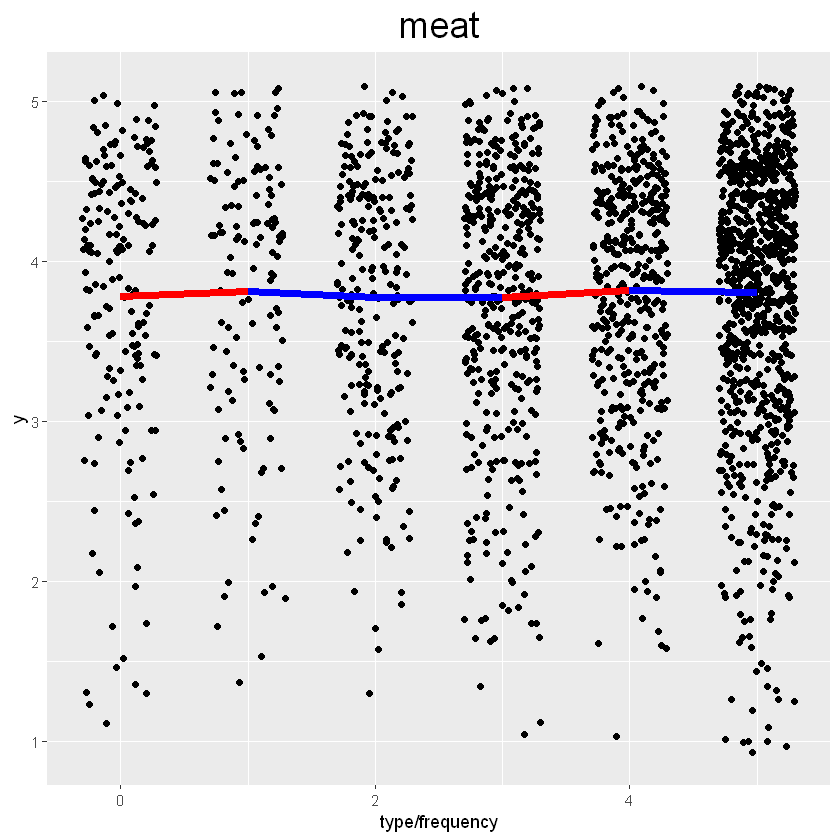

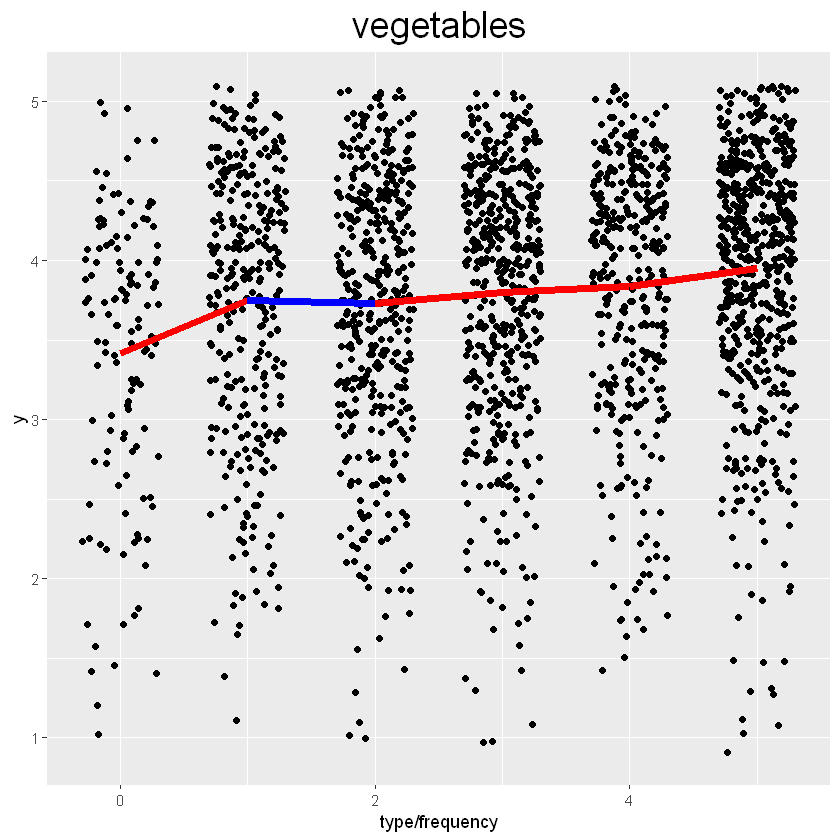

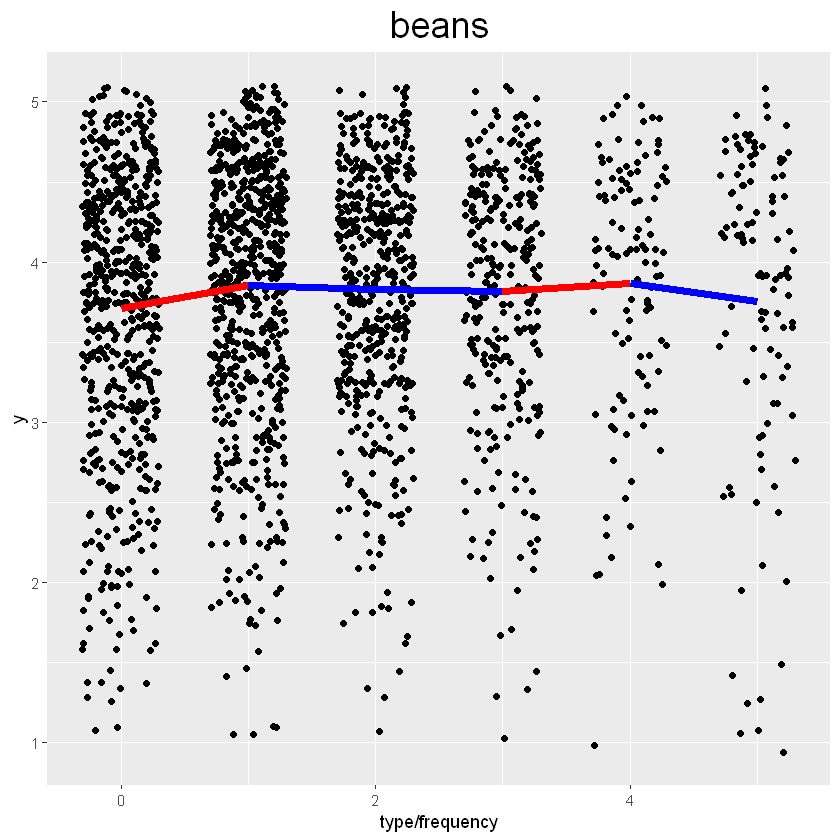

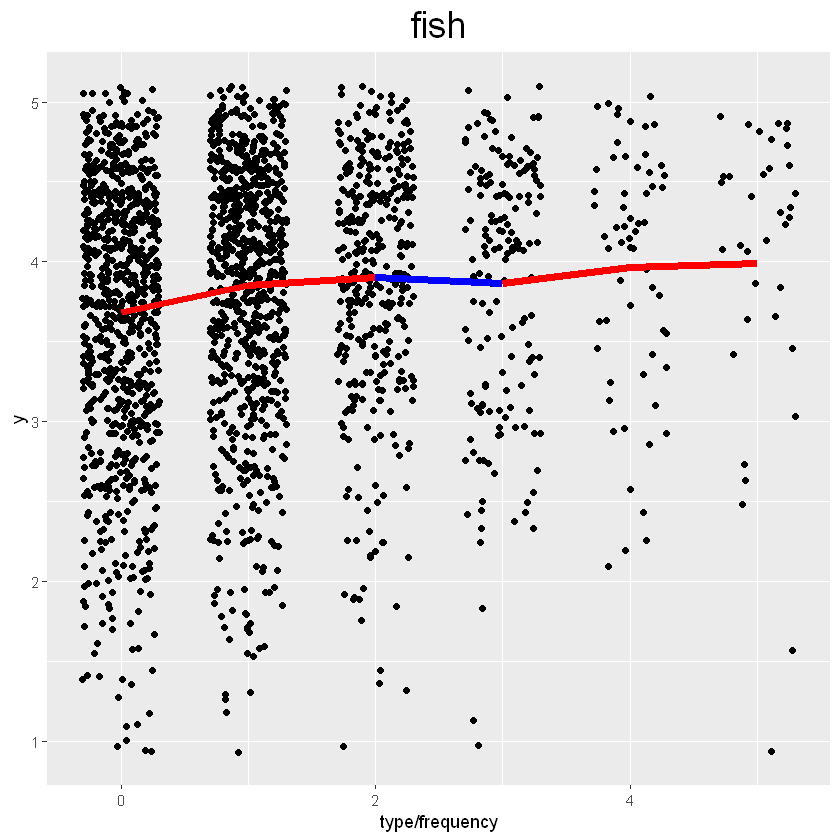

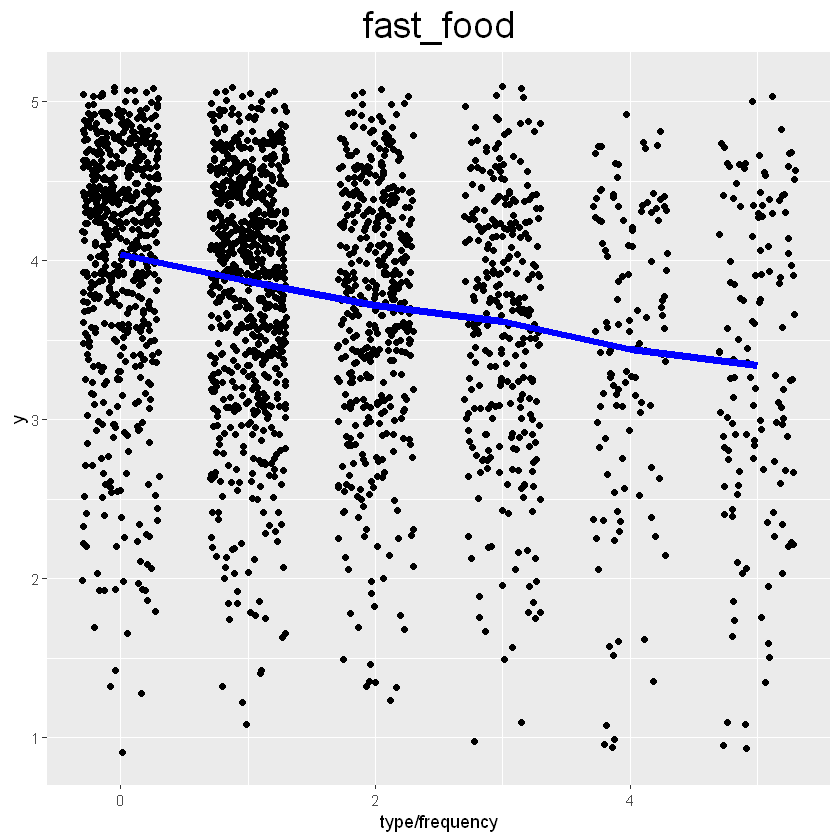

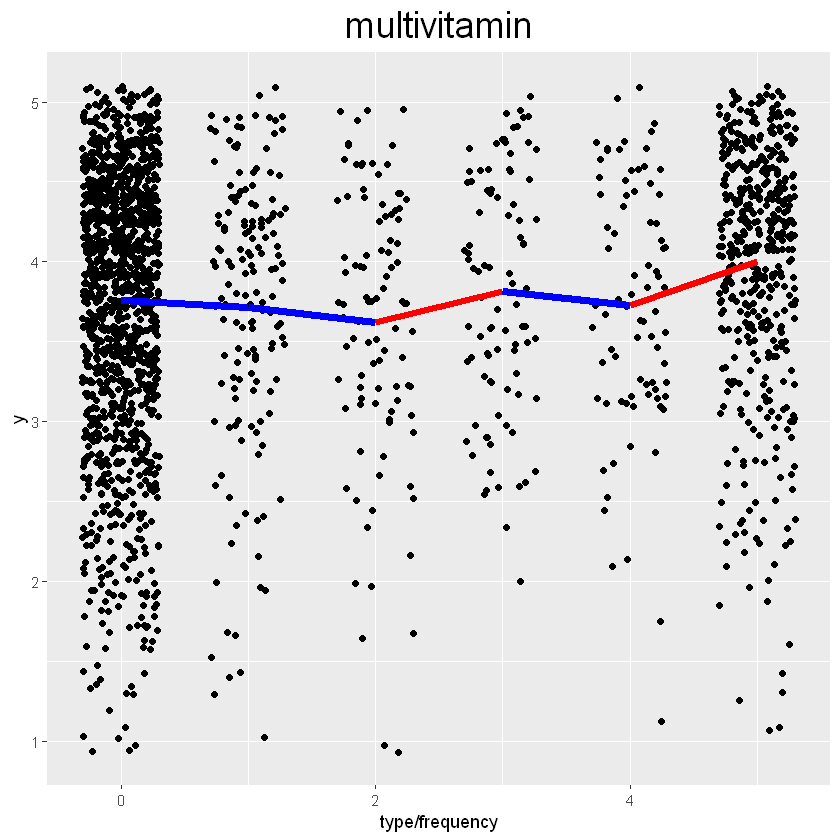

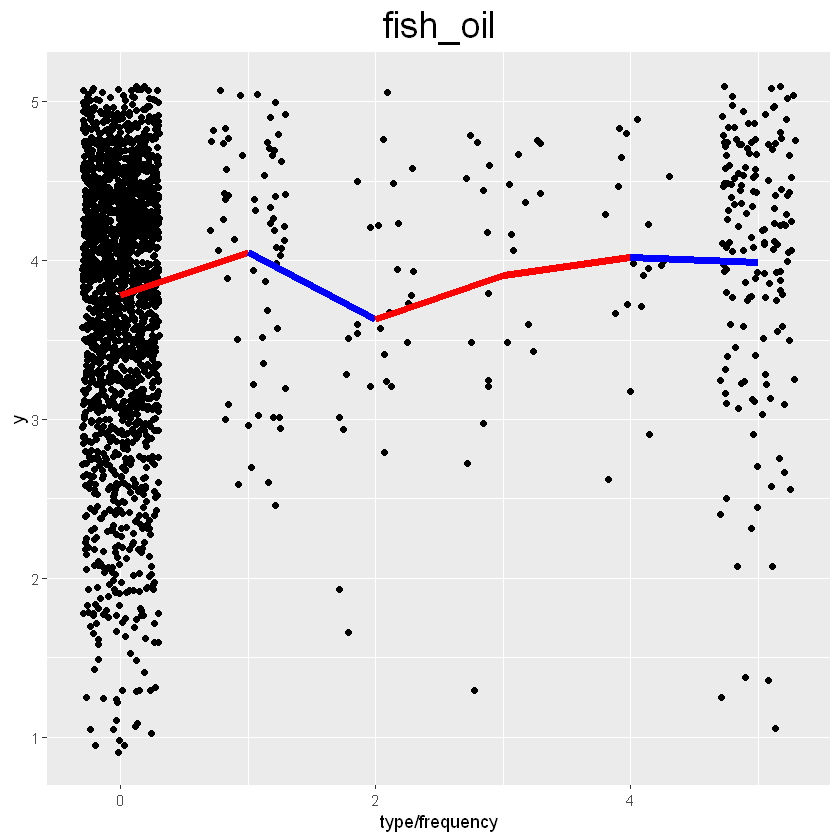

In [47]:
theme_update(plot.title = element_text(hjust = 0.5,size=22))
for (i in 1:dim(x)[2]) {
    what=matrix(0,1,length(unique(x[,i])))
    colnames(what)=sort(unique(x[,i]))
    for (j in 1:length(unique(x[,i]))) {
        what[1,j]=mean(y[x[,i]==sort(unique(x[,i]))[j]])
    }
    whatcol = c()
    for (j in 1:length(what)-1){
        whatcol = c(whatcol,what[j+1] >= what[j])
    }
    whatcol = as.numeric(whatcol)+1
    for (j in 1:length(whatcol)) {
        if (whatcol[j] == 1){
            whatcol[j] = 4
        }
    }
    whatcol = c(whatcol,99)
    p=ggplot(data = data, aes(x = x[,i], y = y))+geom_jitter(width = .3,height = .1)+ggtitle(as.character(colnames(x)[i]))+xlab('type/frequency')+ stat_summary(aes(y = y,group=1), fun.y=mean, colour=whatcol, geom="line",group=1,size = 2)
    print(p)
}

The plot shows:
- There are some variables with only few observations on some levels, those observations need to be removed
- There are some variables suitable for broken stick regression
- Most observations don't eat fish oil at all
- Too many 18-29 years old observations

Remove minor levels:

In [48]:
#Region: Australia/New Zealand, South America
reg = c(which(x$region == "Australia /New Zealand"),which(x$region == "South America"))
#Education: Level 4 and 8 ("Graduate" and "Professional")
edu = c(which(x$education ==4),which(x$education ==8))
x = x[-c(reg,edu),]
y = y[-c(reg,edu)]
dim(x)

[1] 2291   20

---
Variables suitable for broken stick regression:

**Whole_grain, flaxseed/nuts, vegetables**

---

In [49]:
#remove fish_oil variables
round(sum((x$fish_oil)==0)/nrow(x),4)
round(sum((x$age)=='18-29')/nrow(x),4)
x = x[,-20]

[1] 0.8765

[1] 0.6499

There are **88%** of observations don't eat fish oil every week, and **65%** of observations are 18-29 years old.

Therefore, I decide to remove fish oil variable, and sample some observations from 18-29 group to analyze seperately.

# 1.4 New Dataset Summary

A new data set with **2291** observations, **19** variables and **1** response is obtained.

| **Name of variable** | **Type**    | **Description**                            |
|:---------------------|:------------|:-------------------------------------------|
| y (Mental health score)| Numerical   | Mental health score, from 1 to 5         |
| Gender               | Categorical | Female or Male                             |
| Age                  | Categorical | 18-29, 30-39, 40-49 or 50 and above        |
| Region               | Categorical | Continent participant comes from           |
| Diet                 | Categorical | Different diet type                        |
| Education            | Numerical   | From 1 to 8, indicating education level    |
| Exercise             | Numerical   | Frequency of exercise per week             |
| Breakfast            | Numerical   | Frequency of breakfast per week            |
| Whole grain          | Numerical   | Frequency of eating whole grain per week   |
| Dairy product        | Numerical   | Frequency of eating dairy product per week |
| Coffee               | Numerical   | Frequency of drinking coffee per week      |
| Fruit                | Numerical   | Frequency of eating fruit per week         |
| Flaxseed/nuts        | Numerical   | Frequency of eating flaxseed/nuts per week |
| Rice/pasta           | Numerical   | Frequency of eating rice/pasta per week    |
| Meat                 | Numerical   | Frequency of eating meat per week          |
| Vegetables           | Numerical   | Frequency of eating vegetables per week    |
| Beans                | Numerical   | Frequency of eating beans per week         |
| Fish                 | Numerical   | Frequency of eating fish per week          |
| Fast food            | Numerical   | Frequency of eating fast food per week     |
| Multivitamin         | Numerical   | Frequency of eating multivitamin per week  |


# 2.1 Statistical Analysis Setup

I split the whole data into **50%** training dataset and **50%** testing dataset.

In [50]:
df = cbind(y,x)
set.seed(123)
train = df[sample(nrow(df),0.5*nrow(df)),]
test = df[sample(nrow(df),0.5*nrow(df)),]
train_y=train[,1]
train_x=train[,-1]
test_y=test[,1]
test_x=test[,-1]
dim(train_x)
dim(test_x)

[1] 1145   19

[1] 1145   19

Also I want to know more about young age observations.

In [51]:
df18 = df[which(df$age=='18-29'),]
dim(df18)[1]

[1] 1489

In [52]:
lhw <- function(x) ifelse(x < 1,4-x,0)
rhw <- function(x) ifelse(x < 1,0,x-4)
lhv <- function(x) ifelse(x < 1,4-x,0)
rhv <- function(x) ifelse(x < 1,0,x-4)
lhf <- function(x) ifelse(x < 4,4-x,0)
rhf <- function(x) ifelse(x < 4,0,x-4)

# 2.2 Linear Regression Model

As the reponse now is numerical, I use linear regression model first.

<b>Significant variables and their coefficients are:

In [53]:
lmod1 = lm(y~gender+age+region+diet+education+exercise+breakfast+lhw(whole_grain)+rhw(whole_grain)+dairy_product+coffee+
           fruits+lhf(flaxseed_nuts)+rhf(flaxseed_nuts)+rice_pasta+meat+lhv(vegetables)+rhv(vegetables)+beans+fish+fast_food
           +multivitamin, data = train)
round(summary(lmod1)$coef[which(summary(lmod1)$coef[,4] <= .05),c(1,4)],4)

,Estimate,Pr(>|t|)
(Intercept),3.5318,0.0000
genderMale,0.1561,0.0027
age30-39,0.1766,0.0352
age40-49,0.3524,0.0000
age50 and above,0.5449,0.0000
regionNorth America/Central America,0.1487,0.0410
exercise,0.0360,0.0112
breakfast,0.0503,0.0000
coffee,-0.0401,0.0026
lhv(vegetables),-0.0785,0.0044


<b> Use the variables above significant variables to fit linear regression model on test dataset, significant variables and their coefficients are:

In [54]:
lmod2 = lm(y~gender+age+region+exercise+breakfast+coffee+lhv(vegetables)+fast_food, data = test)
round(summary(lmod2)$coef[which(summary(lmod2)$coef[,4] <= .05),c(1,4)],4)

,Estimate,Pr(>|t|)
(Intercept),3.4771,0.0000
genderMale,0.2130,0.0000
age30-39,0.2020,0.0098
age40-49,0.3200,0.0000
age50 and above,0.6076,0.0000
regionNorth America/Central America,0.1833,0.0021
exercise,0.0392,0.0033
breakfast,0.0481,0.0000
coffee,-0.0478,0.0001
lhv(vegetables),-0.0577,0.0287


# 2.3 Backward AIC

To select which variables are significant, I used Backward AIC on linear regression model.

In [55]:
baic = stepAIC(lmod1, direction = 'backward')

Start:  AIC=-627.82
y ~ gender + age + region + diet + education + exercise + breakfast + 
    lhw(whole_grain) + rhw(whole_grain) + dairy_product + coffee + 
    fruits + lhf(flaxseed_nuts) + rhf(flaxseed_nuts) + rice_pasta + 
    meat + lhv(vegetables) + rhv(vegetables) + beans + fish + 
    fast_food + multivitamin

                     Df Sum of Sq    RSS     AIC
- dairy_product       1    0.0001 630.14 -629.82
- lhf(flaxseed_nuts)  1    0.0012 630.14 -629.82
- multivitamin        1    0.0030 630.14 -629.81
- fruits              1    0.0214 630.16 -629.78
- fish                1    0.0337 630.17 -629.76
- meat                1    0.0515 630.19 -629.72
- rhv(vegetables)     1    0.2938 630.43 -629.28
- lhw(whole_grain)    1    0.3552 630.49 -629.17
- rhf(flaxseed_nuts)  1    0.6637 630.80 -628.61
- diet                2    1.9890 632.13 -628.21
- beans               1    0.9391 631.08 -628.11
- rhw(whole_grain)    1    0.9902 631.13 -628.02
- rice_pasta          1    1.0885 631.23 -

                     Df Sum of Sq    RSS     AIC
- rhv(vegetables)     1     0.282 630.53 -641.11
- lhw(whole_grain)    1     0.359 630.60 -640.97
- rhf(flaxseed_nuts)  1     0.805 631.05 -640.16
- diet                2     2.011 632.25 -639.98
- beans               1     0.920 631.16 -639.96
<none>                            630.24 -639.63
- rhw(whole_grain)    1     1.136 631.38 -639.57
- rice_pasta          1     1.294 631.54 -639.28
- education           1     1.767 632.01 -638.42
- region              3     4.248 634.49 -637.94
- exercise            1     3.724 633.97 -634.88
- lhv(vegetables)     1     4.642 634.89 -633.22
- gender              1     5.091 635.33 -632.41
- coffee              1     6.149 636.39 -630.51
- breakfast           1    10.188 640.43 -623.27
- fast_food           1    16.994 647.24 -611.16
- age                 3    32.455 662.70 -588.13

Step:  AIC=-641.11
y ~ gender + age + region + diet + education + exercise + breakfast + 
    lhw(whole_grain) + rhw(

<b> The variables backward AIC select are:

In [56]:
round(baic$coef,4)

(Intercept)                          genderMale 
                             3.4300                              0.1579 
                           age30-39                            age40-49 
                             0.1521                              0.3592 
                    age50 and above                          regionAsia 
                             0.5475                             -0.0744 
                       regionEurope regionNorth America/Central America 
                             0.0977                              0.2047 
                          education                            exercise 
                             0.0283                              0.0398 
                          breakfast                    rhw(whole_grain) 
                             0.0509                             -0.0265 
                             coffee                          rice_pasta 
                            -0.0398                             -0.0274 
                    lhv(vegetables)                           fast_food 
                            -0.0711                             -0.0936

<b> Use the variables backward AIC select to fit linear regression model on test dataset, significant variables and their coefficients are:

In [57]:
lmod_aic = lm(y~gender+age+region+education+exercise+breakfast+rhw(whole_grain)+coffee+rice_pasta+lhv(vegetables)+fast_food,data = test)
round(summary(lmod_aic)$coef[which(summary(lmod_aic)$coef[,4] <= .05),c(1,4)],4)

,Estimate,Pr(>|t|)
(Intercept),3.3166,0.0000
genderMale,0.2059,0.0000
age40-49,0.2411,0.0016
age50 and above,0.5357,0.0000
regionNorth America/Central America,0.1970,0.0010
education,0.0651,0.0009
exercise,0.0402,0.0025
breakfast,0.0485,0.0000
coffee,-0.0462,0.0001
lhv(vegetables),-0.0577,0.0282


# 2.4 Cross Validation on LASSO regression

Also I use cross validation on LASSO regression.

In [58]:
mod_cv = cv.glmnet(data.matrix(train_x), train_y)

mod_lasso = glmnet(x=data.matrix(train_x), y=train_y, family="gaussian", lambda=mod_cv$lambda.min, alpha=1)
round(as.matrix(mod_lasso$beta[which(mod_lasso$beta!=0),]),4)

gender,0.1120
age,0.0778
region,0.0236
education,0.0231
diet,0.0053
exercise,0.0367
breakfast,0.0436
coffee,-0.0364
rice_pasta,-0.0220
vegetables,0.0230
beans,-0.0101


# 2.5 Analysis on 18-29 years old sample

In [59]:
df18s = df[sample(nrow(df18),0.5*nrow(df18)),]
dim(df18s)[1]

[1] 744

<b> Linear regression:

In [60]:
lmod18_1 = lm(y~gender+region+diet+education+exercise+breakfast+lhw(whole_grain)+rhw(whole_grain)+dairy_product+coffee+
           fruits+lhf(flaxseed_nuts)+rhf(flaxseed_nuts)+rice_pasta+meat+lhv(vegetables)+rhv(vegetables)+beans+fish+fast_food
           +multivitamin, data = df18s)
round(summary(lmod18_1)$coef[which(summary(lmod18_1)$coef[,4] <= .05),c(1,4)],4)

,Estimate,Pr(>|t|)
(Intercept),3.2494,0.0000
regionNorth America/Central America,0.2847,0.0002
education,0.1087,0.0000
exercise,0.0493,0.0036
rhf(flaxseed_nuts),0.2325,0.0477
rice_pasta,-0.0493,0.0141
fast_food,-0.0933,0.0000


<b> Backward AIC

In [61]:
baic18 = stepAIC(lmod18_1, direction = 'backward')

Start:  AIC=-438.43
y ~ gender + region + diet + education + exercise + breakfast + 
    lhw(whole_grain) + rhw(whole_grain) + dairy_product + coffee + 
    fruits + lhf(flaxseed_nuts) + rhf(flaxseed_nuts) + rice_pasta + 
    meat + lhv(vegetables) + rhv(vegetables) + beans + fish + 
    fast_food + multivitamin

                     Df Sum of Sq    RSS     AIC
- diet                2    0.8769 386.76 -440.74
- lhw(whole_grain)    1    0.0010 385.89 -440.43
- rhw(whole_grain)    1    0.0014 385.89 -440.43
- fruits              1    0.0272 385.91 -440.38
- gender              1    0.0463 385.93 -440.34
- rhv(vegetables)     1    0.1406 386.03 -440.16
- dairy_product       1    0.1446 386.03 -440.15
- lhv(vegetables)     1    0.2090 386.10 -440.03
- multivitamin        1    0.3299 386.22 -439.80
- meat                1    0.5159 386.40 -439.44
- beans               1    0.7815 386.67 -438.93
- lhf(flaxseed_nuts)  1    0.9996 386.89 -438.51
<none>                            385.89 -438.43


Step:  AIC=-452.11
y ~ region + education + exercise + breakfast + coffee + lhf(flaxseed_nuts) + 
    rhf(flaxseed_nuts) + rice_pasta + meat + lhv(vegetables) + 
    beans + fish + fast_food + multivitamin

                     Df Sum of Sq    RSS     AIC
- lhv(vegetables)     1    0.2287 387.32 -453.67
- multivitamin        1    0.3168 387.41 -453.50
- beans               1    0.5037 387.60 -453.14
- meat                1    0.6162 387.71 -452.92
- lhf(flaxseed_nuts)  1    0.9558 388.05 -452.27
<none>                            387.10 -452.11
- fish                1    1.2907 388.39 -451.63
- breakfast           1    1.5826 388.68 -451.07
- coffee              1    1.6863 388.78 -450.87
- rhf(flaxseed_nuts)  1    2.3838 389.48 -449.54
- rice_pasta          1    3.4050 390.50 -447.59
- exercise            1    4.6938 391.79 -445.14
- fast_food           1   11.9608 399.06 -431.47
- region              3   14.2599 401.36 -431.19
- education           1   15.5899 402.69 -424.73

Step:  

In [62]:
lmod18_2 = lm(y~gender + region + diet + education + exercise + breakfast + coffee 
            + rhf(flaxseed_nuts) + lhv(vegetables) + fast_food, data = df18s)
round(summary(lmod18_2)$coef[which(summary(lmod18_2)$coef[,4] <= .05),c(1,4)],4)

,Estimate,Pr(>|t|)
(Intercept),3.2955,0.0000
regionNorth America/Central America,0.2615,0.0006
education,0.1037,0.0000
exercise,0.0538,0.0008
coffee,-0.0298,0.0460
fast_food,-0.0998,0.0000


<b> Cross validation

In [63]:
colnames(df18s)

[1] "y"             "gender"        "age"           "region"       
 [5] "education"     "diet"          "exercise"      "breakfast"    
 [9] "whole_grain"   "dairy_product" "coffee"        "fruits"       
[13] "flaxseed_nuts" "rice_pasta"    "meat"          "vegetables"   
[17] "beans"         "fish"          "fast_food"     "multivitamin"

In [64]:
y_18 = df18s$y
x_18 = df18s[,c(-1,-3)]
mod_cv_18 = cv.glmnet(data.matrix(x_18), y_18)

mod_lasso_18 = glmnet(x=data.matrix(x_18), y=y_18, family="gaussian", lambda=mod_cv_18$lambda.min, alpha=1)
round(as.matrix(mod_lasso_18$beta[which(mod_lasso_18$beta!=0),]),4)

region,0.0370
education,0.0922
exercise,0.0449
breakfast,0.0150
coffee,-0.0179
rice_pasta,-0.0376
meat,0.0119
vegetables,0.0118
beans,-0.0032
fish,0.0248
fast_food,-0.0908


# Prediction

To see if the data is predictable, I trained the above models on training set and test on test set. The prediction result of first 100 observations on test set is shown below.

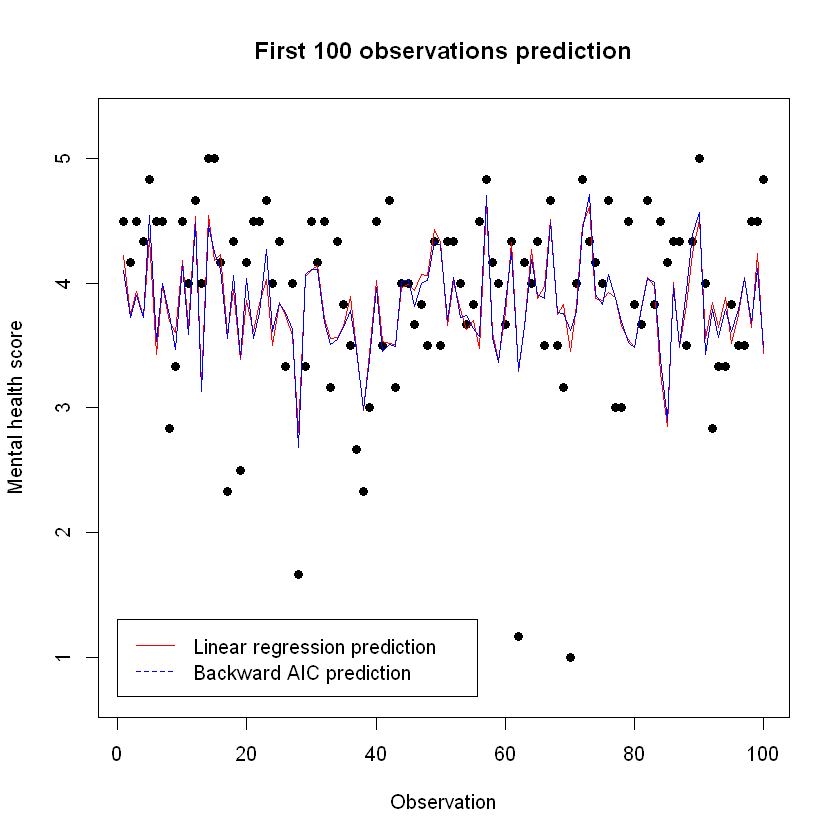

In [65]:
par(mfrow=c(1,1))
plot(test_y[1:100], pch=16, cex=1, ylim = c(0.7,5.3),
     xlab = 'Observation', ylab = 'Mental health score', main = 'First 100 observations prediction')

lines(predict(lmod2,test_x)[1:100], col = 'red')
lines(predict(lmod_aic,test_x)[1:100], col = 'blue')
legend(0,1.3,legend = c('Linear regression prediction','Backward AIC prediction')
       ,col = c('red','blue'),lty = 1:2, cex = 1)

In [66]:
mset = as.matrix(c(MSE(predict(lmod2,test_x),test_y),MSE(predict(lmod_aic, test_x),test_y)),2,1)
rownames(mset) = c('linear regression','backward AIC')
colnames(mset) = 'Mean Squared Error'
mset

,Mean Squared Error
linear regression,0.5548137
backward AIC,0.5478575


From the plot and MSE table, we could see that using linear regression and backward AIC give very similar result. Also, they both could only predict in a limit range. The models can not predict very low mental status score and thus not suitable to predict.